<a href="https://colab.research.google.com/github/ItsMeBerk/MachineLearningCourse/blob/main/linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')


Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


In [2]:
X1 = X1.reshape(m, 1)
print(X1)
print(X1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


In [3]:
bias = np.ones((m, 1))
print(bias)
print(bias.shape)


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(6, 1)


In [4]:
X = np.append(bias, X1, axis=1)
print(X)
print(X.shape)


[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
(6, 2)


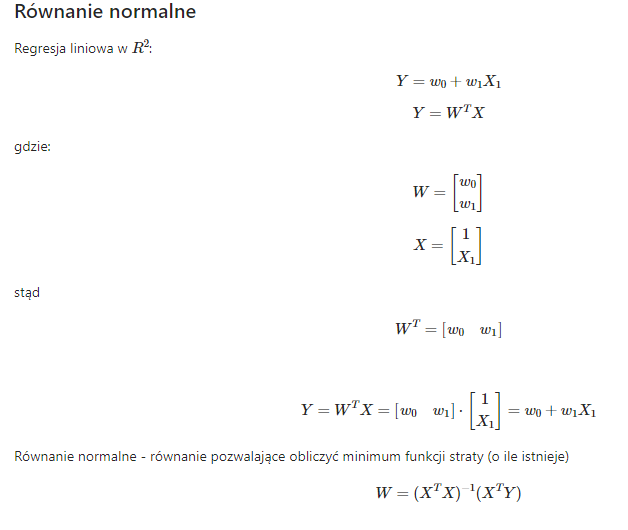

In [5]:
np.dot(X.T, X)

array([[ 6., 21.],
       [21., 91.]])

In [6]:
L = np.linalg.inv(np.dot(X.T, X))
L

array([[ 0.86666667, -0.2       ],
       [-0.2       ,  0.05714286]])

In [7]:
P = np.dot(X.T, Y)
P

array([21750., 80500.])

In [8]:
np.dot(L, P)

array([2750.,  250.])

Regresja liniowa przy pomocy scikit-learn

In [10]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X1, Y)

print(regression.intercept_)
print(regression.coef_[0])

2750.0
250.0


# Metoda spadku wzdłuż gradientu

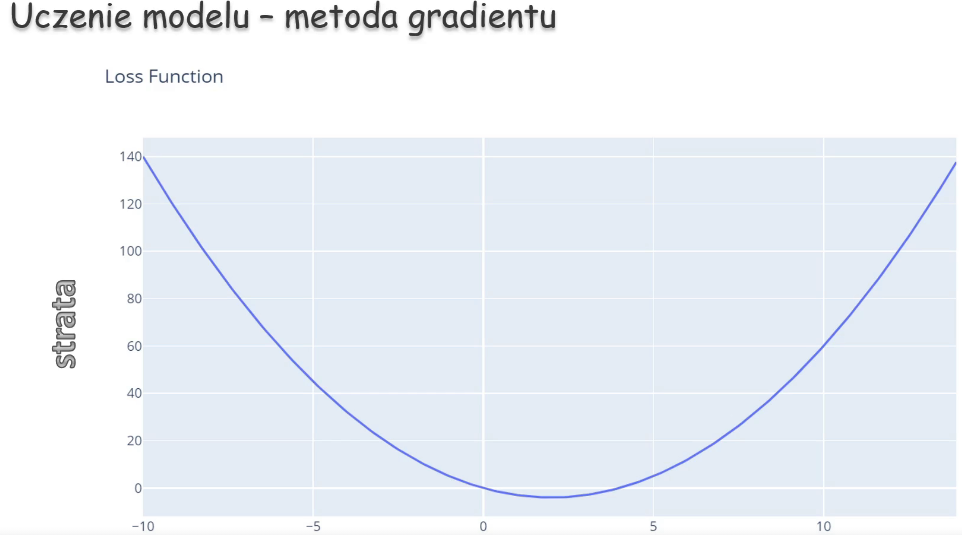

Algorytm służący do znajdowania optimum problemu.
Zaczynamy od losowo dobranego parametru (punktu na wykresie)
Predykcja modelu i obliczenie błędu za pomocą zdefiniowanej funkcji straty.
Aktualizujemy parametry, aby funkcję straty minimalizować
Gradient funkcji - mówi o kierunku, w którym funkcja straty rośnie najszybciej.
Z każdą iteracją powinniśmy być bliżej punktu optimum (minimum).
Wyznaczenie wskaźniku uczenia - jak szybko parametry będą aktualizowane, im mniejszy -> tym dłużej dochodzisz do rozwiązania
za duży -> popsute rozwiązanie

Przekazujemy dane do modelu -> dokonujemy predykcji -> obliczamy funkcję straty, aktualizujemy, a dalej przekazujemy do modelu i coraz bliżej punktu minimum

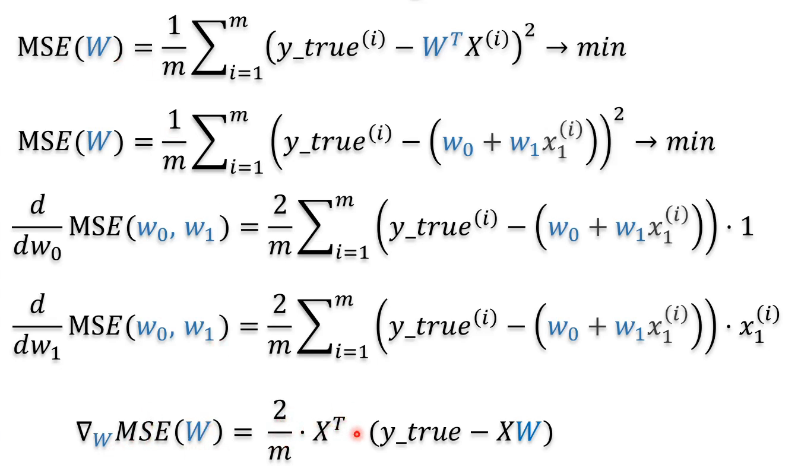

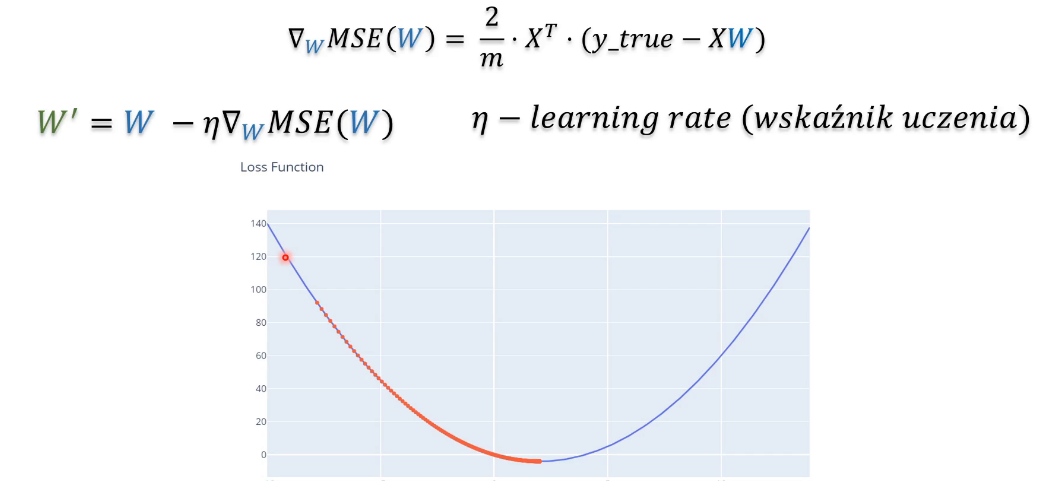

In [11]:
import numpy as np
import pandas as pd
import plotly.express as px

np.random.seed(42)

In [12]:
X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


Przygotowanie danych

In [13]:
X1 = X1.reshape(m, 1)
Y = Y.reshape(-1, 1)
print(X1)
print(X1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


In [14]:
bias = np.ones((m, 1))
print(bias)
print(bias.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(6, 1)


In [15]:
X = np.append(bias, X1, axis=1)
print(X)
print(X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
(6, 2)


Losowa inicjalizacja parametrów

In [16]:
eta = 0.01

weights = np.random.randn(2, 1)
print(X)
print(weights)


[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
[[ 0.49671415]
 [-0.1382643 ]]


Metoda gradientu prostego

In [17]:
intercept = []
coef = []

for i in range(3000):
    gradient = (2 / m) * X.T.dot(X.dot(weights) - Y)
    weights = weights - eta * gradient
    intercept.append(weights[0][0])
    coef.append(weights[1][0])

print(weights)

[[2749.9560089 ]
 [ 250.01027542]]


In [18]:
df = pd.DataFrame(data={'intercept': intercept, 'coef': coef})
df.head()

,intercept,coef
0,72.996458,268.202239
1,125.262372,450.071141
2,163.752145,573.114529
3,192.859085,656.140472
4,215.572070,711.944393


Wizualizacja dopasowania

In [19]:
px.line(df, y='intercept', width=800, title='Dopasowanie: intercept')

In [20]:
px.line(df, y='coef', width=800, title='Dopasowanie: coef')

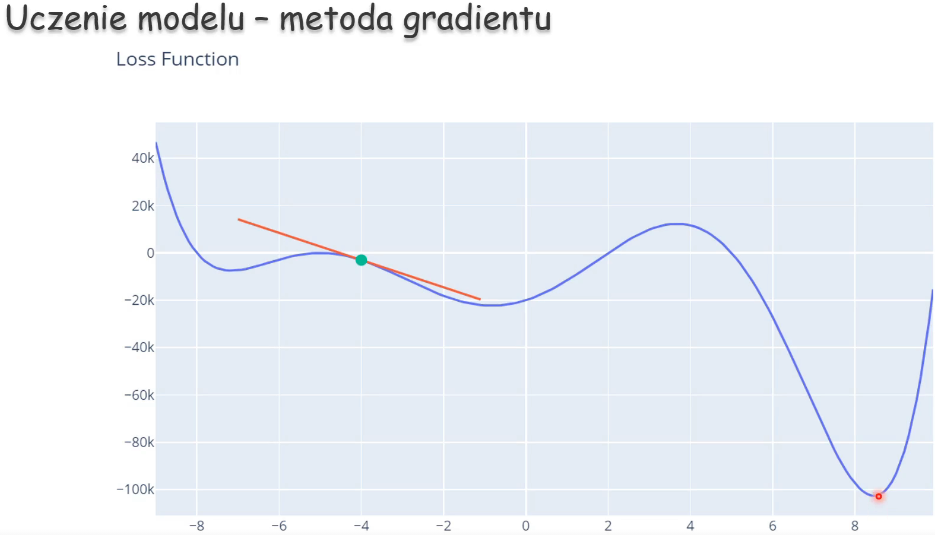

Chcemy znaleźć minimum globalne

Pułapki

^ w takim wypadku należy popróbować z różnych punktów albo zwiększyć poziom uczenia

Stochastyczny spadek w dół gradientu

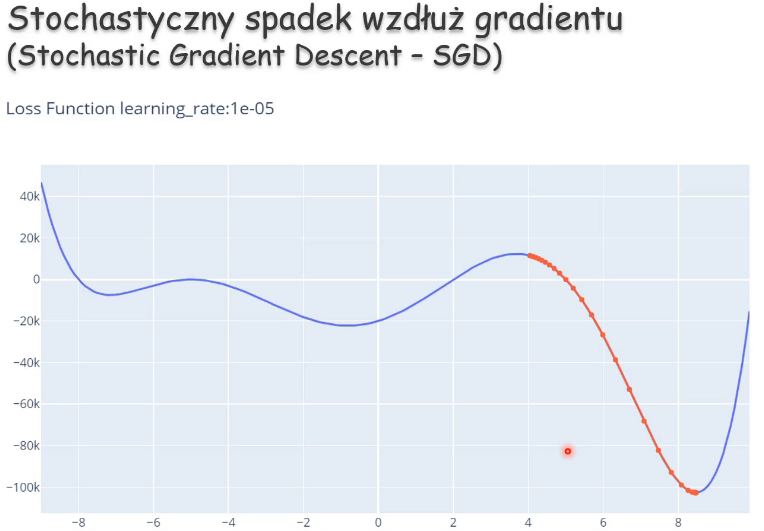

Regresja R2

In [21]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

'1.2.2'

Wygenerowanie danych

In [22]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')



data shape: (100, 1)
target shape: (100,)


In [23]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [24]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

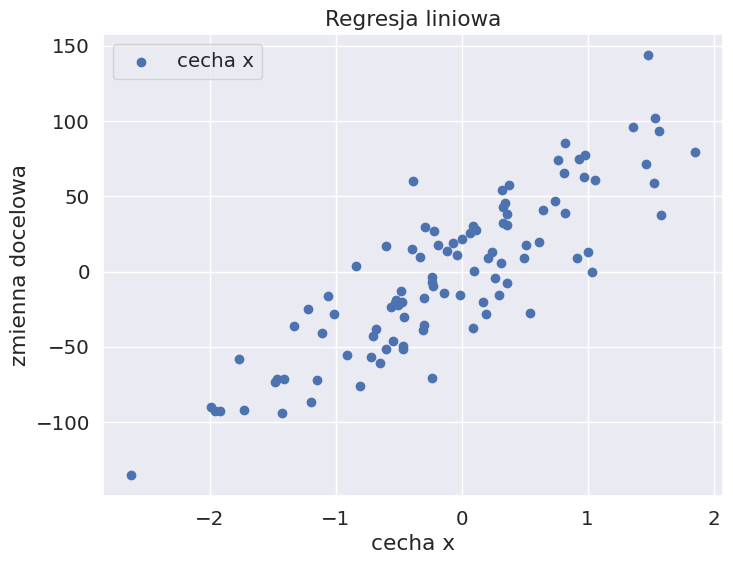

In [25]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.plot()

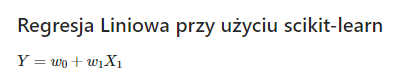

Regresja liniowa za pomocą sci-kit learn

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# metoda fit() dopasowuje model liniowy do danych
regressor.fit(data, target)

LinearRegression()

In [28]:
# metoda score() dokonuje oceny modelu na przekazanych danych (wynik R2 score)
regressor.score(data, target)

0.7426670084336404

In [29]:
# metoda predict() dokonuje predykcji na podstawie modelu
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

Wizualizacja graficzna modelu

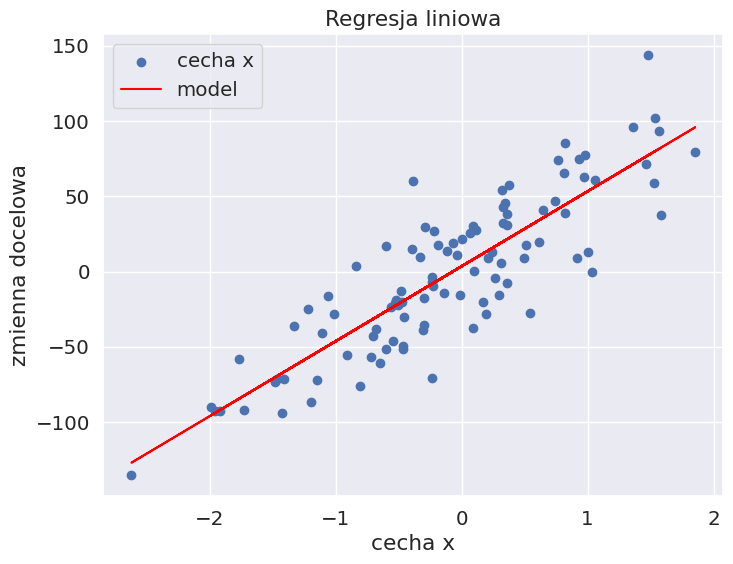

In [30]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()

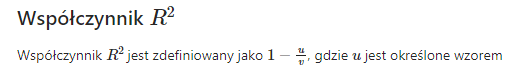

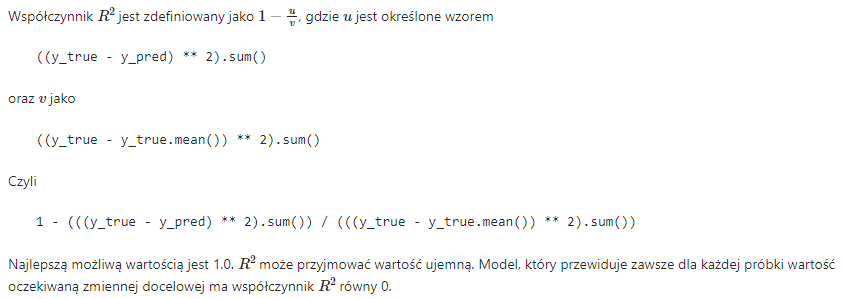

In [32]:
regressor.score(data, target)

0.7426670084336404

In [33]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [34]:
regressor.coef_

array([49.83])

In [35]:
regressor.intercept_

3.4953459615809184

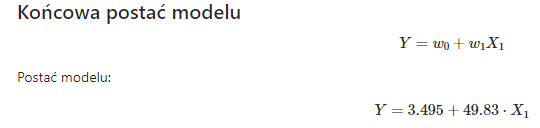

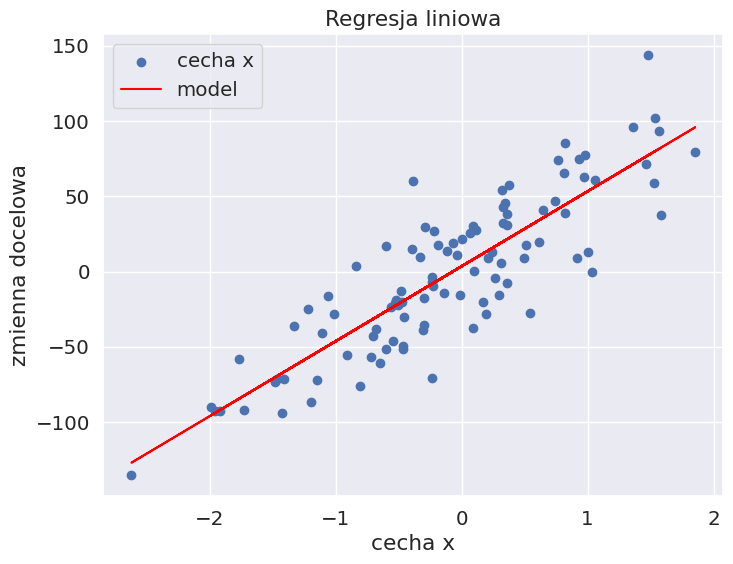

In [36]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()
plt.show()

# Regresja z podziałem na zbiór treningowy oraz testowy

In [37]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


[]

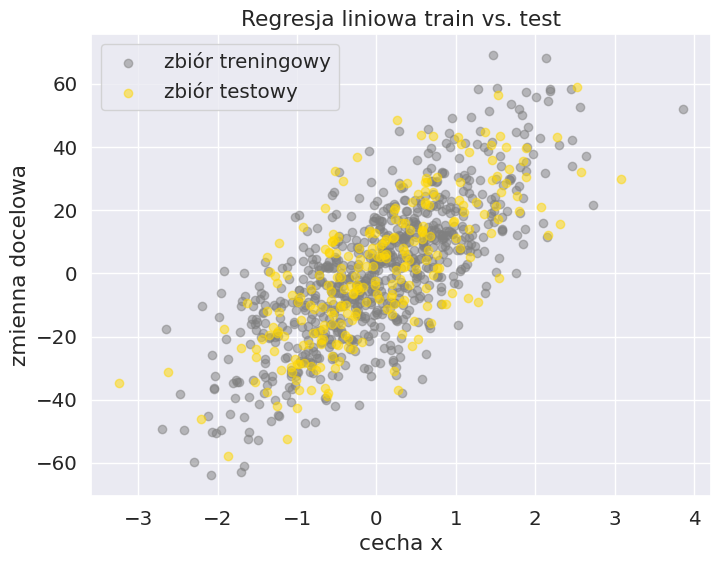

In [39]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs. test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.plot()

In [40]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [41]:
regressor.score(X_train, y_train)

0.5550440098049001

In [42]:
regressor.score(X_test, y_test)


0.5108438585354155

Regresja liniowa - zbiór treningowy - wizualizacja

[]

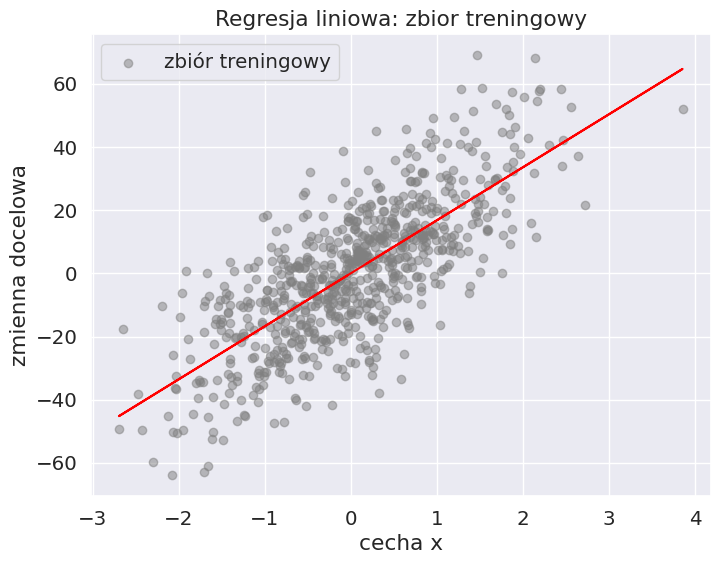

In [43]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.plot()

Regresja liniowa - zbiór testowy - wizualizacja

[]

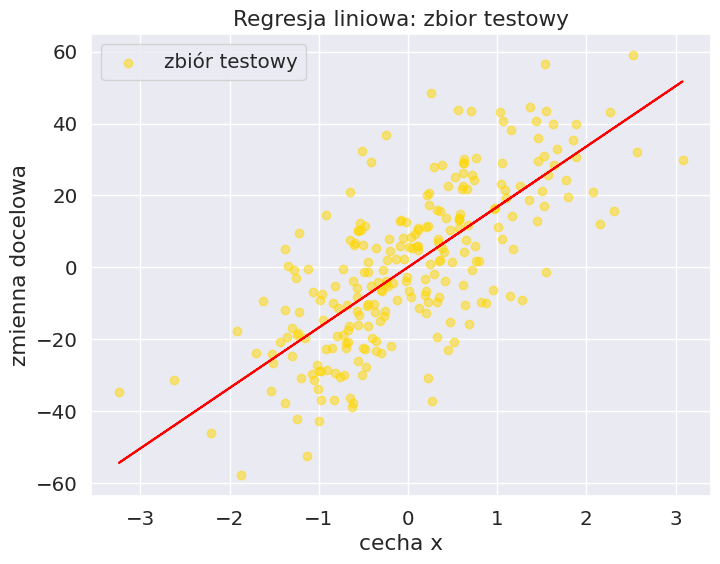

In [44]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()
plt.plot()


Predykcja na podstawie modelu

In [45]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()


,y_true,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495


In [46]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


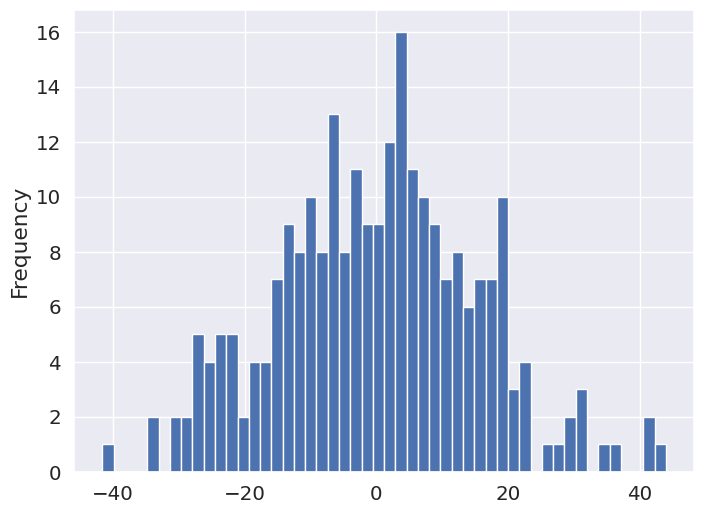

In [47]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8, 6))